In [6]:
from datetime import datetime
import numpy as np
import pandas
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import cartopy.crs as ccrs
from pycwr.draw.RadarPlot import Graph, GraphMap
from pycwr.io.auto_io import radar_io 

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
#radar time: 1050UTC

linfen_ffn = '/g/data/kl02/jss548/cma_project/cinrad_20190424/LinFen/Z_RADR_I_Z9357_20190424105000_O_DOR_CC_CAP.bin.bz2'
datong_ffn = '/g/data/kl02/jss548/cma_project/cinrad_20190424/DaTong/Z_RADR_I_Z9352_20190424105100_O_DOR_CB_CAP.bin.bz2'
luoyang_ffn = '/g/data/kl02/jss548/cma_project/cinrad_20190424/LuoYang/Z_RADR_I_Z9379_20190424104800_O_DOR_SA_CAP.bin.bz2'
sanmenxia_ffn = '/g/data/kl02/jss548/cma_project/cinrad_20190424/SanMenXia/Z_RADR_I_Z9398_20190424104900_O_DOR_SB_CAP.bin.bz2'
report_ffn = '/g/data/kl02/jss548/cma_project/cinrad_20190424/reports/wsci-ori.txt'

19


/home/548/jss548/miniconda3/envs/radar-dev/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


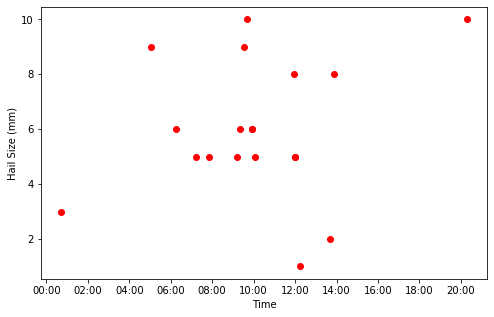

In [8]:
#read reports
df = pandas.read_csv(report_ffn, header=0, sep='\t', na_values=[999999,999998])
rdict = df.to_dict(orient='list')
report_id = rdict['Station_ID']
report_lat = rdict['Lat']
report_lon = rdict['Lon']
report_dt = []
for i,_ in enumerate(rdict['Year']):
    report_dt.append(datetime(rdict['Year'][i],rdict['Mon'][i],rdict['Day'][i],rdict['Hour'][i],rdict['Min'][i]))
report_wind_max = np.array(rdict['WIN_S_INST_Max(m/s)'])
report_hail_max = np.array(rdict['HAIL_Diam_Max(mm)'])

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(report_dt,report_hail_max,'ro')
print(np.nansum(report_hail_max>0))
plt.xlabel('Time')
plt.ylabel('Hail Size (mm)')

date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)

In [14]:
def plot_cma_radar(radar_ffn, elv_idx):
    #load data
    data = radar_io(radar_ffn)
    NRadar = data.ToPRD()
    print(vars(NRadar))
    elv_angle_list = NRadar.scan_info.fixed_angle.data
    #plot
    fig = plt.figure(figsize=(10,12))
    ax = plt.axes(projection=ccrs.PlateCarree())
    graph = GraphMap(NRadar, ccrs.PlateCarree())
    graph.plot_ppi_map(ax, elv_idx, "dBZ", cmap="pyart_NWSRef",)
    ax.set_title("example of PPI with map for elevation " + str(elv_angle_list[elv_idx]) + ' deg', fontsize=16)
    plt.show()

{'fields': [<xarray.Dataset>
Dimensions:    (range: 500, time: 512)
Coordinates:
    azimuth    (time) float64 0.0 0.7045 1.409 2.114 ... 357.9 358.6 359.3 360.0
    elevation  (time) float64 0.5 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5 0.5
    x          (time, range) float64 0.0 0.0 0.0 ... -3.665e-11 -3.673e-11
    y          (time, range) float64 300.0 599.9 899.9 ... 1.496e+05 1.499e+05
    z          (time, range) float64 924.0 926.7 929.3 ... 3.546e+03 3.554e+03
    lat        (time, range) float64 36.07 36.07 36.07 ... 37.41 37.41 37.41
    lon        (time, range) float64 111.5 111.5 111.5 ... 111.5 111.5 111.5
  * range      (range) float64 300.0 600.0 900.0 ... 1.494e+05 1.497e+05 1.5e+05
  * time       (time) datetime64[ns] 2019-04-24T18:44:53 ... 2019-04-24T18:45:28.604731
Data variables:
    dBZ        (time, range) float32 nan nan nan nan nan ... nan nan nan nan nan
    V          (time, range) float32 nan nan nan nan nan ... nan nan nan nan nan
    W          (time, rang

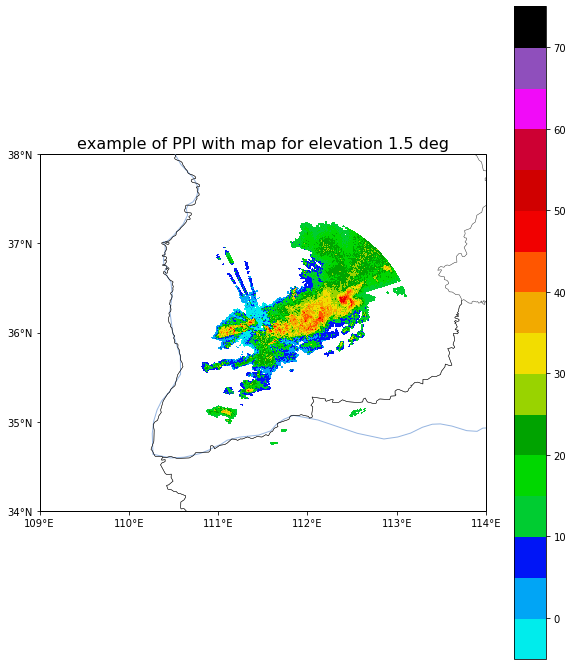

In [15]:
radar_ffn_list = [linfen_ffn, datong_ffn, luoyang_ffn, sanmenxia_ffn]
elv_idx = 1
for radar_ffn in radar_ffn_list:
    plot_cma_radar(radar_ffn, elv_idx)
    break